In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random
import os

2024-07-10 13:09:56.545923: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 13:09:57.736958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Path to the .npz file
npz_file_path = 'matrices.npz'

# Load the .npz file
data = np.load(npz_file_path)

# Get the list of keys (which correspond to the original .npy file names without the extension)
keys = list(data.keys())

# Load the first matrix to determine its shape
first_matrix = data[keys[0]]
matrix_shape = first_matrix.shape
print(keys[0])
print(len(keys))

# Pre-allocate the array to hold all matrices
num_matrices = len(keys)
boards = np.empty((num_matrices, *matrix_shape), dtype=first_matrix.dtype)

# Load each matrix into the pre-allocated array
for i, key in enumerate(keys):
    boards[i] = data[key]
    if (i + 1) % 1000 == 0:
        print(f'Loaded {i + 1} matrices')

# Optional: Print the shape of the resulting array for verification
print("Shape of stacked boards array:", boards.shape)

matrix_0
37028
Loaded 1000 matrices
Loaded 2000 matrices
Loaded 3000 matrices
Loaded 4000 matrices
Loaded 5000 matrices
Loaded 6000 matrices
Loaded 7000 matrices
Loaded 8000 matrices
Loaded 9000 matrices
Loaded 10000 matrices
Loaded 11000 matrices
Loaded 12000 matrices
Loaded 13000 matrices
Loaded 14000 matrices
Loaded 15000 matrices
Loaded 16000 matrices
Loaded 17000 matrices
Loaded 18000 matrices
Loaded 19000 matrices
Loaded 20000 matrices
Loaded 21000 matrices
Loaded 22000 matrices
Loaded 23000 matrices
Loaded 24000 matrices
Loaded 25000 matrices
Loaded 26000 matrices
Loaded 27000 matrices
Loaded 28000 matrices
Loaded 29000 matrices
Loaded 30000 matrices
Loaded 31000 matrices
Loaded 32000 matrices
Loaded 33000 matrices
Loaded 34000 matrices
Loaded 35000 matrices
Loaded 36000 matrices
Loaded 37000 matrices
Shape of stacked boards array: (37028, 15, 15)


In [19]:
with open("results.txt",  "r") as f:
    ratings = f.readlines()

ratings = [float(rating.strip()) for rating in ratings]
ratings = np.array(ratings)
ratings

array([ 4.00000000e+02,  0.00000000e+00,  3.19800000e+02, ...,
       -4.70000000e+02,  9.99897298e+07, -1.29020000e+03])

(37028, 15, 15)
(37028,)


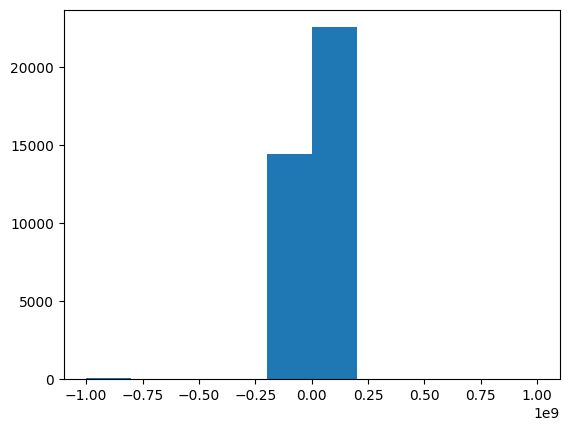

In [20]:
data_array = boards.reshape(-1, 15, 15, 1)
ratings = np.array(ratings)

print(boards.shape)
print(ratings.shape)

plt.hist(ratings)
plt.show()

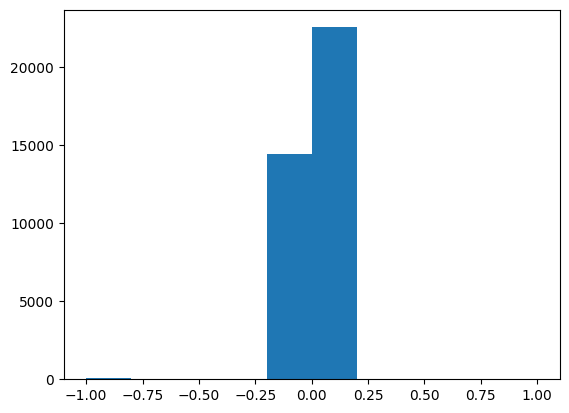

In [25]:
transformed_ratings = ratings / 1e9

plt.hist(transformed_ratings)
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(boards, ratings, test_size=0.2, random_state=17)

In [27]:
inp = Input(shape=(15, 15, 1))

x = Conv2D(8, (3, 3), activation='relu', padding='same')(inp)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(144, activation='relu')(x)
x= Dropout(0.5)(x)

output = Dense(1, activation="linear")(x)
model = Model(inputs=inp, outputs=output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 15, 15, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 144)            │        20,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,273 (87.00 KB)

 Trainable params: 22,273 (87.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
inp = Input(shape=(15, 15, 1))

x = Conv2D(8, (3, 3), activation='relu', padding="same")(inp)
x = Conv2D(8, (3, 3), activation='relu', padding="same")(inp)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(12, (3, 3), activation='relu', padding="same")(x)
x = Conv2D(12, (3, 3), activation='relu', padding="same")(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(120, activation='relu')(x)

output = Dense(1, activation="linear")(x)
model = Model(inputs=inp, outputs=output)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 15, 15, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 15, 15, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 12)       │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 12)       │         1,308 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 108)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │        13,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,465 (60.41 KB)

 Trainable params: 15,465 (60.41 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer=Adam(0.001), loss=MeanSquaredError(), metrics=['mae'])

In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

hst = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/60
926/926 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0056 - mae: 0.0300 - val_loss: 0.0042 - val_mae: 0.0108
Epoch 2/60
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0026 - mae: 0.0073 - val_loss: 0.0042 - val_mae: 0.0082
Epoch 3/60
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0024 - mae: 0.0071 - val_loss: 0.0042 - val_mae: 0.0083
Epoch 4/60
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0030 - mae: 0.0081 - val_loss: 0.0042 - val_mae: 0.0106
Epoch 5/60
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0025 - mae: 0.0078 - val_loss: 0.0042 - val_mae: 0.0080
Epoch 6/60
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0020 - mae: 0.0063 - val_loss: 0.0042 - val_mae: 0.0159
Epoch 7/60
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0031 - mae: 0.0084 - val_loss: 0.0042 - val_mae: 0.0094
Epoch 8/60
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0028 - mae: 0.0075 - val_loss: 0.0042 - val_mae: 0.0075
Epoch 9/60
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - lo

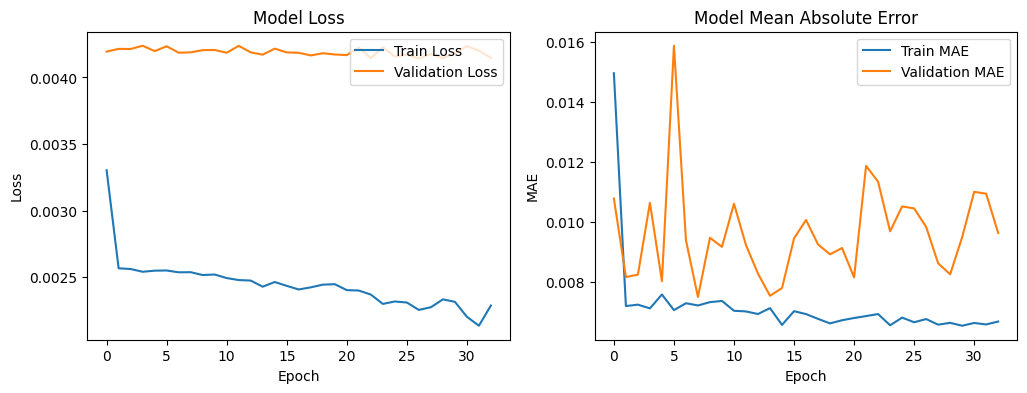

In [30]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(hst.history['loss'], label='Train Loss')
plt.plot(hst.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Metric (Mean Absolute Error in this case)
plt.subplot(1, 2, 2)
plt.plot(hst.history['mae'], label='Train MAE')
plt.plot(hst.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')

plt.show()


In [31]:
preds = model.predict(X_test)

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [32]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045 - mae: 0.0103
Test Loss: [0.004142572171986103, 0.009846015833318233]


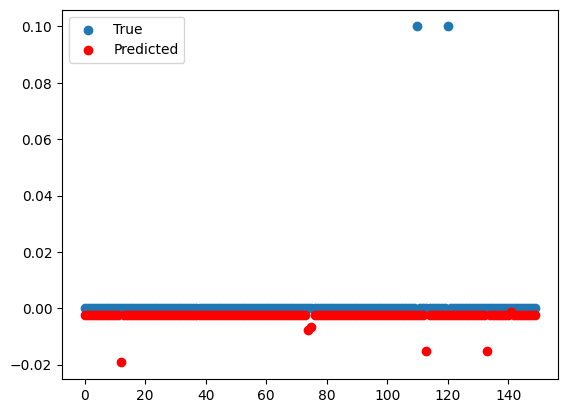

In [36]:
n = 150
index = range(n)
plt.scatter(index, y_test[:n], label='True')
plt.scatter(index, preds[:n], label='Predicted', color='r')
plt.legend()
plt.show()

In [34]:
model.save('gomoku-goated.keras')

In [26]:
preds

array([[-1.0022930e+00],
       [ 6.6766061e-04],
       [ 9.9853474e-01],
       ...,
       [-1.0016495e+00],
       [-1.0023925e+00],
       [ 6.6766061e-04]], dtype=float32)